In [59]:
# Import pandas for data handling
import pandas as pd

# Import seaborn for data visualization
import seaborn as sns

# Import stats module from scipy for statistical operations
from scipy import stats

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import metrics to evaluate the model performance (MAE and R2 score)
from sklearn.metrics import mean_absolute_error, r2_score


In [60]:
# Load dataset 
df = pd.read_csv('power.csv')

# Display first few rows
print(df.head())


      AT      V       AP     RH      PE
0   8.34  40.77  1010.84  90.01  480.48
1  23.64  58.49  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43


In [61]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [62]:
# Get the description of the dataset
description = df.describe()
print(description)

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


In [63]:
# Shows a tuple with row and column size
df.shape 

(9568, 5)

In [64]:
# Display information about the dataframe, including the index dtype and column dtypes, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [65]:
# Returns the first few rows of the DataFrame df
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Five Interseting Insights from dataset

### 1. Relationship Between Atmospheric Pressure (AP) and Relative Humidity (RH)
Atmospheric pressure (AP) might be inversely related to relative humidity (RH). Higher atmospheric pressure could indicate dry air, resulting in lower humidity levels.

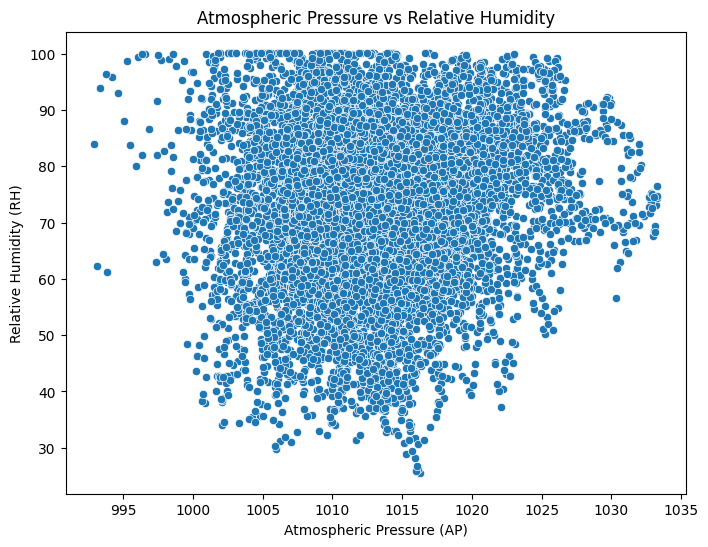

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AP', y='RH')
plt.title('Atmospheric Pressure vs Relative Humidity')
plt.xlabel('Atmospheric Pressure (AP)')
plt.ylabel('Relative Humidity (RH)')
plt.show()

### 2. Distribution of Power Consumption (PE)
The distribution of power consumption (PE) can reveal whether it's skewed or normally distributed. 

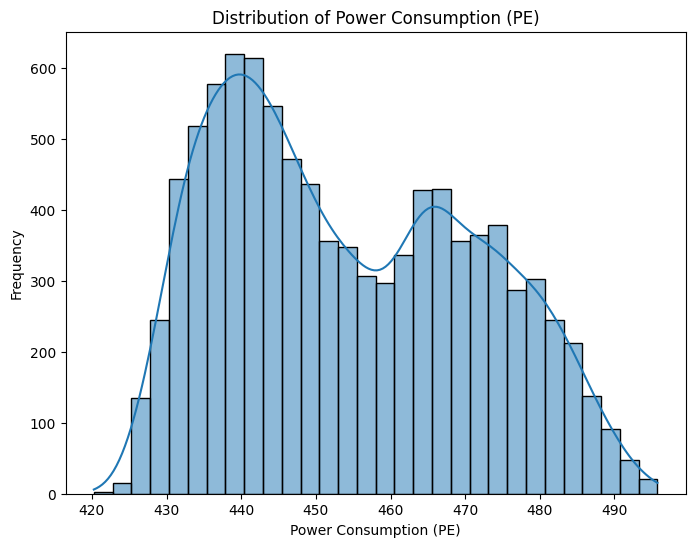

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(df['PE'], kde=True, bins=30)
plt.title('Distribution of Power Consumption (PE)')
plt.xlabel('Power Consumption (PE)')
plt.ylabel('Frequency')
plt.show()

### 3. Correlation Matrix to Find Relationships Between Variables
A correlation matrix can help identify strong linear relationships between the features. 

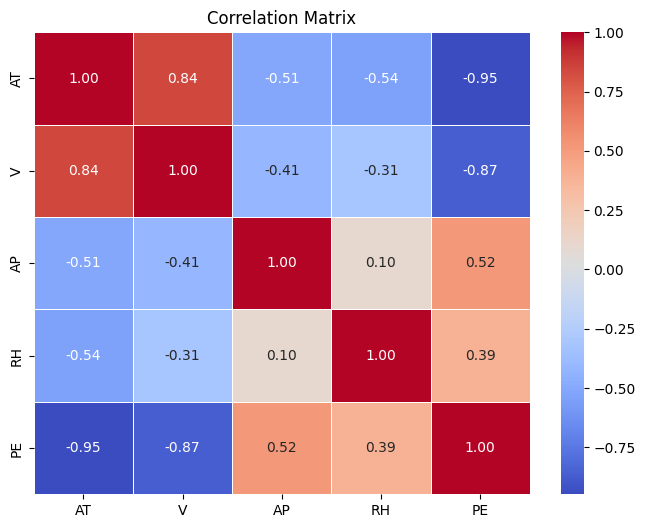

In [68]:
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 4. Power Consumption (PE) vs Temperature (AT)
Analyzing the relationship between temperature (AT) and power consumption (PE) could reveal patterns, such as higher power consumption during extreme temperatures

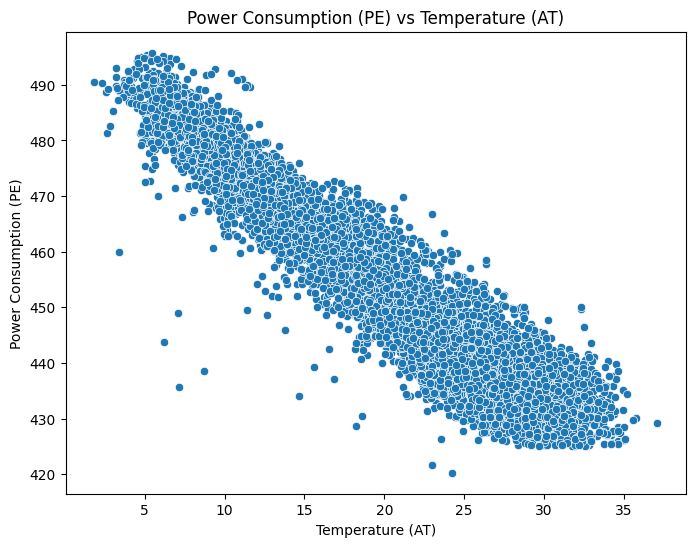

In [69]:
# Rename columns for consistency
df.rename(columns={'AT': 'Temperature', 'PE': 'PowerConsumption'}, inplace=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Temperature', y='PowerConsumption')
plt.title('Power Consumption (PE) vs Temperature (AT)')
plt.xlabel('Temperature (AT)')
plt.ylabel('Power Consumption (PE)')
plt.show()


### 5. Power Consumption (PE) vs Relative Humidity (RH)
The relationship between power consumption (PE) and relative humidity (RH) can reveal if higher humidity leads to increased energy usage, possibly due to air conditioning or heating needs.

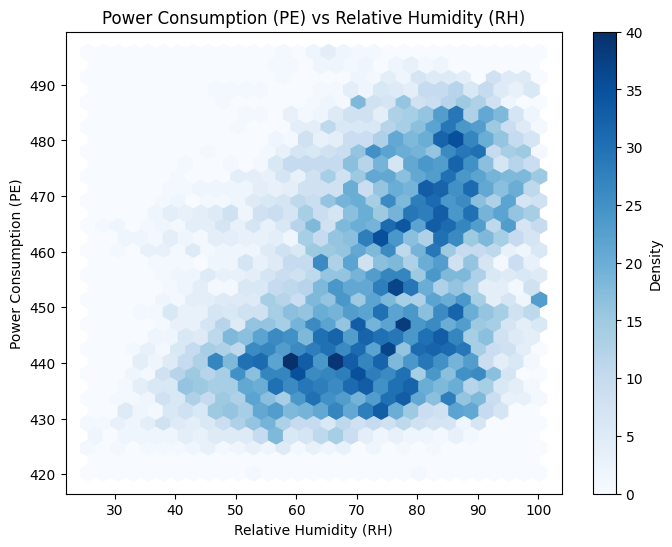

In [70]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['RH'], df['PowerConsumption'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Power Consumption (PE) vs Relative Humidity (RH)')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Power Consumption (PE)')
plt.show()


In [71]:
# Rename 'RH' to 'Humidity' for consistency
df.rename(columns={'RH': 'Humidity'}, inplace=True)

# Keep only Temperature, Humidity, and Power Output
df = df[['Temperature', 'Humidity', 'PowerConsumption']]
print(df.head())


   Temperature  Humidity  PowerConsumption
0         8.34     90.01            480.48
1        23.64     74.20            445.75
2        29.74     41.91            438.76
3        19.07     76.79            453.09
4        11.80     97.20            464.43


In [72]:
# Remove outliers (using Z-score method)
z_scores = stats.zscore(df[['Temperature', 'Humidity', 'PowerConsumption']])
df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Removing outliers where z-score > 3

In [73]:

# Define independent variables (X) and target variable (y)
X = df[['Temperature', 'Humidity']]
y = df['PowerConsumption']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:


# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")  # Corresponds to Temperature and Humidity


Intercept: 516.5129958218963
Coefficients: [-2.38922265 -0.20638815]


In [75]:
# Predict power consumption on test data
y_pred = model.predict(X_test)

# Compare actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


      Actual   Predicted
2513  433.27  433.716723
9411  438.16  439.130214
8745  458.42  459.346281
9085  480.82  475.835476
4950  441.41  435.119074


R² Score and Mean Absolute Error (MAE) to check the model's accuracy.

In [76]:


# Calculate R² Score and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")


R² Score: 0.9237148842536314
Mean Absolute Error: 3.709926155709864


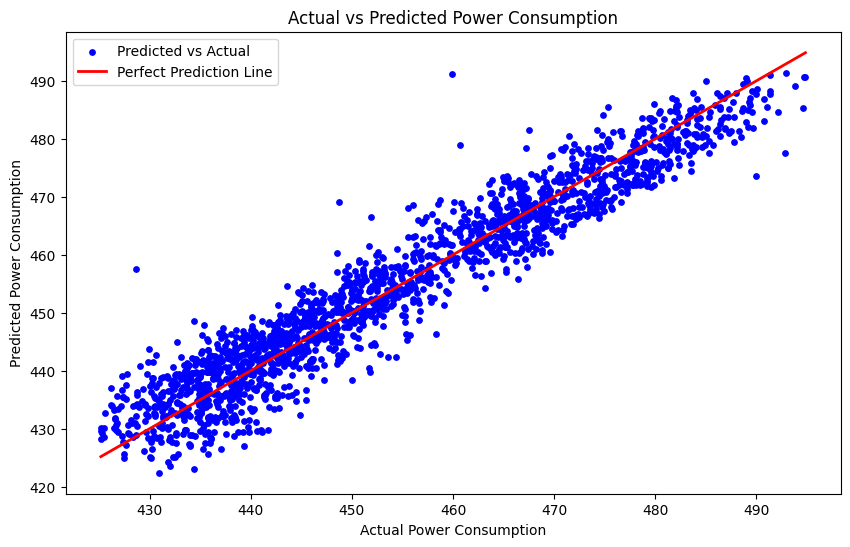

In [77]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', s=15)

# Plot a reference line (y = x), which shows the ideal case where actual = predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction Line')

plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.show()
